In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import xfacpy

In [ ]:
import time

dim=10
[xi,wi]=xfacpy.GK15(0,1)
ci=xfacpy.CTensorCI(xfacpy.funtestRn, [xi]*dim);
print("rank pivotError time")
t0=time.time()
t0_l = []
for i in range(1, 201):
    ci.iterate()
    t0_l += [time.time()-t0]
    if i % 10 == 0:
        print(i, ci.pivotError[-1], time.time()-t0)

rank pivotError time
10 6.846077291236725 0.03240799903869629
20 5.960212458783417 0.13105225563049316
30 7.6586576256406715 0.32460689544677734
40 8.198268241393862 0.6621272563934326
50 10.750692557012144 1.2139742374420166
60 9.211770526226076 2.0703043937683105
70 8.480643032128683 3.351280927658081
80 12.857877083820256 5.051130771636963
90 12.55805400433428 7.2806782722473145
100 11.531936078621243 10.130287885665894
110 11.377831192723534 13.593989372253418
120 12.2121280262336 17.782015562057495
130 11.758067722173223 22.802443265914917
140 11.628915641278468 28.53317904472351
150 9.52669552247744 35.02234244346619
160 11.308487550440077 42.19805359840393
170 8.839170355865463 50.552226066589355


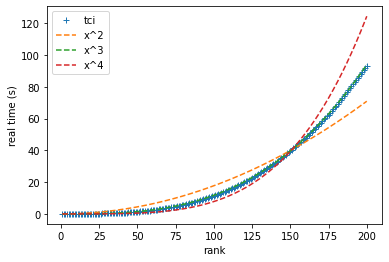

In [6]:
import matplotlib.pyplot as plt
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("rank")
plt.ylabel("real time (s)")
rank_l=range(1,len(t0_l)+1)
#plt.xlim(100,201)
#plt.ylim(20,300)
plt.plot(rank_l, t0_l,'+',label='tci')
for n in [2,3,4]:
    factor=t0_l[150]/rank_l[150]**n
    plt.plot(rank_l,[x**n*factor for x in rank_l],'--', label=f'x^{n}')
    
plt.legend();

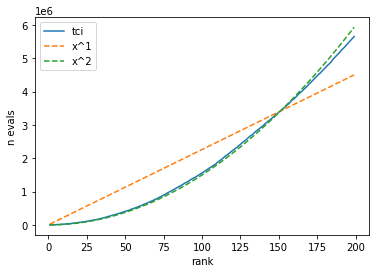

In [7]:
import matplotlib.pyplot as plt
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("rank")
plt.ylabel("n evals")
rank_l=range(1,len(ci.nEval)+1)
neval_l=np.cumsum(ci.nEval)
plt.plot(rank_l, neval_l, label='tci')
for n in [1,2]:
    factor=neval_l[150]/rank_l[150]**n
    plt.plot(rank_l,[x**n*factor for x in rank_l],'--', label=f'x^{n}')
plt.legend();